# Лабораторная 3 --- Supervised

## Разбиение датасета, выделение target

In [30]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


def add_next_part(df, next_part):
    return pd.concat([df, next_part], ignore_index=True)


feature = 'Household_income'
train_ratio = 0.8
valid_ratio = 0.1

cities_df = pd.read_csv('..\\parser\\us_cities.csv')
cities_df = cities_df.loc[cities_df[feature] > 0].dropna()
cities_df = cities_df.iloc[:, 6:]
cities_df = (cities_df - cities_df.min()) / (cities_df.max() - cities_df.min())
cities_df = cities_df.sample(frac=1)

df_size = len(cities_df)
train_last_index = int(df_size * train_ratio)
train_df = cities_df[:train_last_index]
valid_last_index = int(train_last_index + df_size * valid_ratio)
valid_df = cities_df[train_last_index : valid_last_index]
test_df = cities_df[valid_last_index :]

train_target = train_df[feature]
train_df = train_df.drop(columns=[feature])
valid_target = valid_df[feature]
valid_df = valid_df.drop(columns=[feature])
test_target = test_df[feature]
test_df = test_df.drop(columns=[feature])

In [27]:
def predict(regressor):
    regressor.fit(train_df, train_target)
    # Train data predict
    train_predict = regressor.predict(train_df)
    train_error.append(r2_score(train_target, train_predict))
    # Validation data predict
    valid_predict = regressor.predict(valid_df)
    valid_error.append(r2_score(valid_target, valid_predict))
    # Test data predict
    test_predict = regressor.predict(test_df)
    test_error.append(r2_score(test_target, test_predict))
    
    
def draw(title, x_label, values):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('R2 score')
    plt.plot(values, train_error, label='Train data')
    plt.plot(values, valid_error, label='Validation data')
    plt.plot(values, test_error, label='Test data')
    plt.legend()

## Метод k ближайших соседей

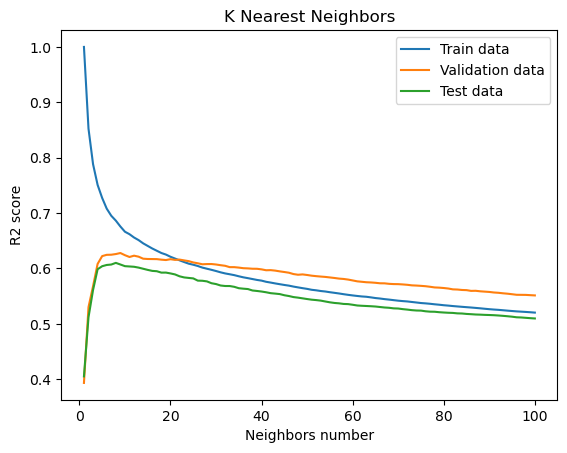

In [32]:
from sklearn.neighbors import KNeighborsRegressor

neighbors_limit = 100
neighbors = range(1, neighbors_limit + 1)
train_error = []
valid_error = []
test_error = []

for n in neighbors:
    predict(KNeighborsRegressor(n_neighbors=n))

draw(title='K Nearest Neighbors', x_label='Neighbors number', values=neighbors)

## Метод линейной регрессии с L2-регуляризацией

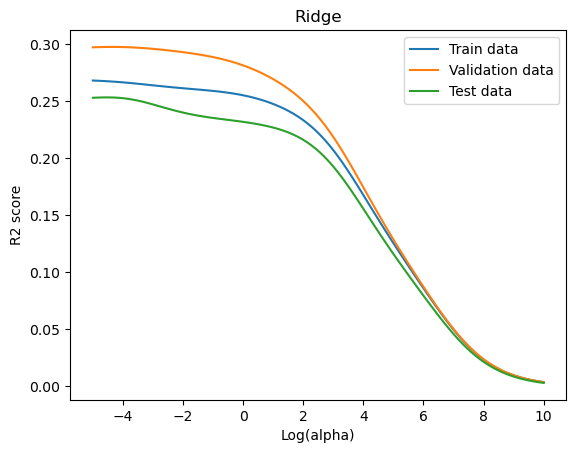

In [31]:
from sklearn.linear_model import Ridge
from numpy import exp, linspace

cases_number = 100
alphas = linspace(start=-5, stop=10, num=cases_number)
train_error = []
valid_error = []
test_error = []

for a in alphas:
    predict(Ridge(alpha=exp(a)))

draw(title='Ridge', x_label='Log(alpha)', values=alphas)

## Дерево принятия решений

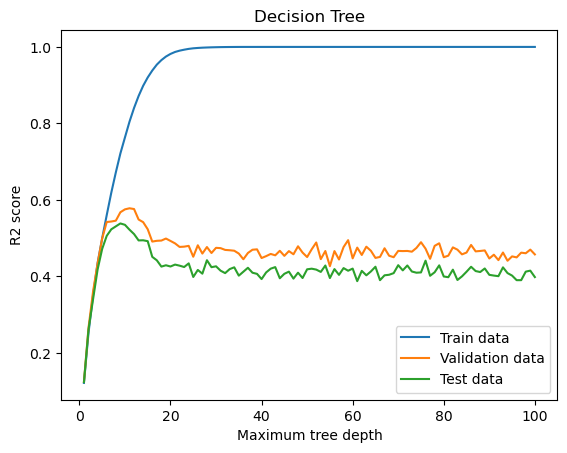

In [33]:
from sklearn.tree import DecisionTreeRegressor

depth_limit = 100
depths = range(1, depth_limit + 1)
train_error = []
valid_error = []
test_error = []

for d in depths:
    predict(DecisionTreeRegressor(max_depth=d))

draw(title='Decision Tree', x_label='Maximum tree depth', values=depths)

## AdaBoost ансамбль

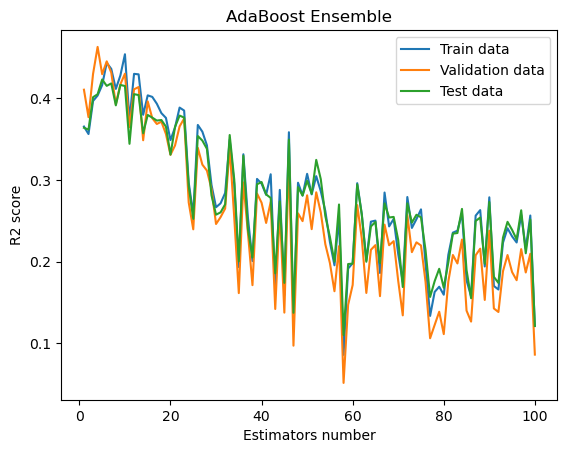

In [34]:
from sklearn.ensemble import AdaBoostRegressor

estimators_limit = 100
estimators = range(1, estimators_limit + 1)
train_error = []
valid_error = []
test_error = []

for n in estimators:
    predict(AdaBoostRegressor(n_estimators=n))

draw(title='AdaBoost Ensemble', x_label='Estimators number', values=estimators)